In [1]:
import transformers

In [2]:
clip_m = transformers.CLIPModel.from_pretrained("openai/clip-vit-base-patch32")

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

In [3]:
vit_m = transformers.CLIPModel.from_pretrained("google/vit-base-patch16-224-in21k")

You are using a model of type vit to instantiate a model of type clip. This is not supported for all configurations of models and can yield errors.


model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Some weights of CLIPModel were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['logit_scale', 'text_model.embeddings.position_embedding.weight', 'text_model.embeddings.token_embedding.weight', 'text_model.encoder.layers.0.layer_norm1.bias', 'text_model.encoder.layers.0.layer_norm1.weight', 'text_model.encoder.layers.0.layer_norm2.bias', 'text_model.encoder.layers.0.layer_norm2.weight', 'text_model.encoder.layers.0.mlp.fc1.bias', 'text_model.encoder.layers.0.mlp.fc1.weight', 'text_model.encoder.layers.0.mlp.fc2.bias', 'text_model.encoder.layers.0.mlp.fc2.weight', 'text_model.encoder.layers.0.self_attn.k_proj.bias', 'text_model.encoder.layers.0.self_attn.k_proj.weight', 'text_model.encoder.layers.0.self_attn.out_proj.bias', 'text_model.encoder.layers.0.self_attn.out_proj.weight', 'text_model.encoder.layers.0.self_attn.q_proj.bias', 'text_model.encoder.layers.0.self_attn.q_proj.weight', 'text_model.encoder.layers.0.self_attn.v_pro

In [11]:
from transformers import ViTImageProcessor, BertTokenizer, VisionEncoderDecoderModel
from datasets import load_dataset

# CLIP

image_processor = ViTImageProcessor.from_pretrained("google/vit-base-patch16-224-in21k")
tokenizer = BertTokenizer.from_pretrained("google-bert/bert-base-uncased")
model = VisionEncoderDecoderModel.from_encoder_decoder_pretrained(
    "google/vit-base-patch16-224-in21k", "google-bert/bert-base-uncased"
)

model.config.decoder_start_token_id = tokenizer.cls_token_id
model.config.pad_token_id = tokenizer.pad_token_id



Some weights of BertLMHeadModel were not initialized from the model checkpoint at google-bert/bert-base-uncased and are newly initialized: ['bert.encoder.layer.0.crossattention.output.LayerNorm.bias', 'bert.encoder.layer.0.crossattention.output.LayerNorm.weight', 'bert.encoder.layer.0.crossattention.output.dense.bias', 'bert.encoder.layer.0.crossattention.output.dense.weight', 'bert.encoder.layer.0.crossattention.self.key.bias', 'bert.encoder.layer.0.crossattention.self.key.weight', 'bert.encoder.layer.0.crossattention.self.query.bias', 'bert.encoder.layer.0.crossattention.self.query.weight', 'bert.encoder.layer.0.crossattention.self.value.bias', 'bert.encoder.layer.0.crossattention.self.value.weight', 'bert.encoder.layer.1.crossattention.output.LayerNorm.bias', 'bert.encoder.layer.1.crossattention.output.LayerNorm.weight', 'bert.encoder.layer.1.crossattention.output.dense.bias', 'bert.encoder.layer.1.crossattention.output.dense.weight', 'bert.encoder.layer.1.crossattention.self.key.bi

In [ ]:
from transformers import ViTImageProcessor, BertTokenizer, VisionEncoderDecoderModel
from datasets import load_dataset
import matplotlib.pyplot as plt

Generating test split:   0%|          | 0/1 [00:00<?, ? examples/s]

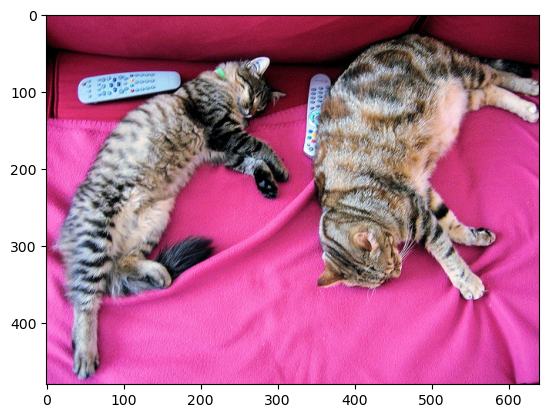

In [38]:
!ls ../../img/

AdobeStock_93532344_Preview.jpeg


In [ ]:
AdobeStock_93532344_Preview.jpeg

(200, 1000, 3)


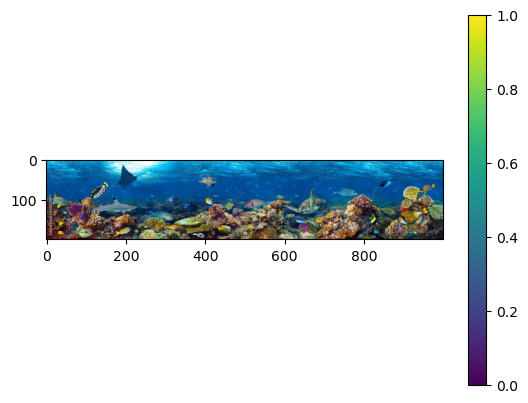

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].


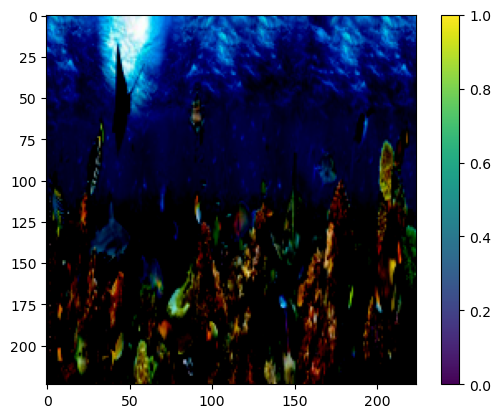

In [94]:
from PIL import Image
import pandas as pd
import numpy as np

# Open the image
img = Image.open('../../img/AdobeStock_136920677_Preview.jpeg')

# Convert image to numpy array
img_array = np.array(img)

# img_array = np.transpose(img_array, (1, 0, 2))
# img_array = img_array[:, :10, :]

print(img_array.shape)

img_array = img_array/255

plt.imshow(img_array)
plt.colorbar()
plt.show()


img_array = img_array*255

# image is 
pixel_values = image_processor(img_array, return_tensors="pt").pixel_values
plt.imshow(pixel_values[0].permute(1,2,0))
plt.colorbar()
plt.show()


In [ ]:
# load image dataset
dataset = load_dataset("huggingface/cats-image")

(100, 640, 3)

In [92]:
dataset["test"]["image"]

[<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=640x480>]

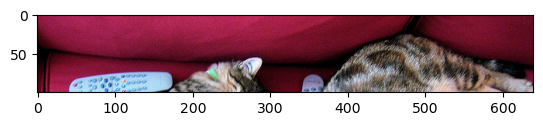

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.99215686].


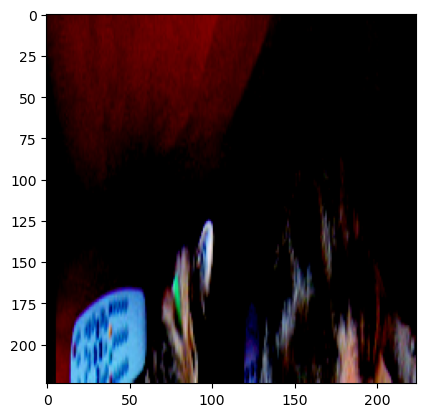

pixel process, torch.Size([1, 3, 224, 224])
label process, torch.Size([1, 11])


In [90]:


# 
image = dataset["test"]["image"][0]
image = np.array(image)[:100]
plt.imshow(image)
plt.show()

# image is 
pixel_values = image_processor(image, return_tensors="pt").pixel_values

plt.imshow(pixel_values[0].permute(1,2,0))
plt.show()

# encode text
labels = tokenizer(
    "an image of two cats chilling on a couch",
    return_tensors="pt",
).input_ids


print(f"pixel process, {pixel_values.shape}")
print(f"label process, {labels.shape}")


In [32]:
labels

tensor([[  101,  2019,  3746,  1997,  2048,  8870, 27017,  2006,  1037,  6411,
           102]])

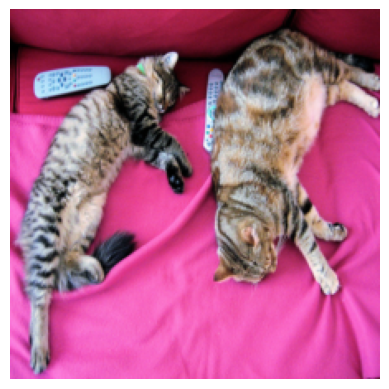

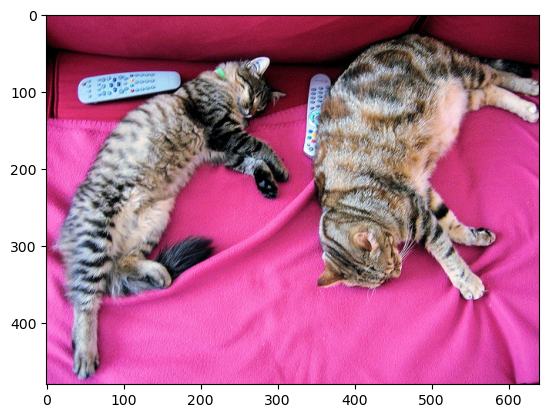

In [29]:
# Permute dimensions to [H, W, C]
img = pixel_values[0].permute(1, 2, 0)
# Convert to numpy
img_np = img.numpy()
# If values are not in [0, 1], you may want to normalize or clip
img_np = (img_np - img_np.min()) / (img_np.max() - img_np.min())
plt.imshow(img_np)
plt.axis('off')
plt.show()

# 
image = dataset["test"]["image"][0]
plt.imshow(image)
plt.show()

In [31]:
# image is 
pixel_values = image_processor(img_np, return_tensors="pt").pixel_values

It looks like you are trying to rescale already rescaled images. If the input images have pixel values between 0 and 1, set `do_rescale=False` to avoid rescaling them again.


torch.Size([1, 3, 224, 224])


TypeError: Invalid shape (3, 224, 224) for image data

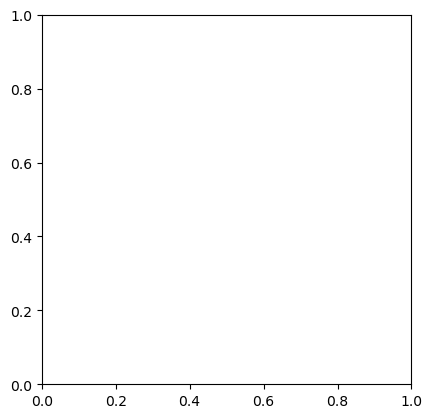

In [27]:
print(
    pixel_values.shape, 

)

plt.imshow(pixel_values[0])


In [18]:
model

VisionEncoderDecoderModel(
  (encoder): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTSdpaAttention(
            (attention): ViTSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(i

In [ ]:
model.encoder.embeddings

ViTEmbeddings(
  (patch_embeddings): ViTPatchEmbeddings(
    (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
  )
  (dropout): Dropout(p=0.0, inplace=False)
)

In [17]:
model(pixel_values=pixel_values, labels=labels).keys()

odict_keys(['loss', 'logits', 'past_key_values', 'encoder_last_hidden_state'])

In [ ]:
# the forward function automatically creates the correct decoder_input_ids
loss = model(pixel_values=pixel_values, labels=labels).loss

In [4]:
clip_m

CLIPModel(
  (text_model): CLIPTextTransformer(
    (embeddings): CLIPTextEmbeddings(
      (token_embedding): Embedding(49408, 512)
      (position_embedding): Embedding(77, 512)
    )
    (encoder): CLIPEncoder(
      (layers): ModuleList(
        (0-11): 12 x CLIPEncoderLayer(
          (self_attn): CLIPSdpaAttention(
            (k_proj): Linear(in_features=512, out_features=512, bias=True)
            (v_proj): Linear(in_features=512, out_features=512, bias=True)
            (q_proj): Linear(in_features=512, out_features=512, bias=True)
            (out_proj): Linear(in_features=512, out_features=512, bias=True)
          )
          (layer_norm1): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
          (mlp): CLIPMLP(
            (activation_fn): QuickGELUActivation()
            (fc1): Linear(in_features=512, out_features=2048, bias=True)
            (fc2): Linear(in_features=2048, out_features=512, bias=True)
          )
          (layer_norm2): LayerNorm((512,), eps=1e